In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV 
from treatment import get_treated_data

In [47]:
X_train, X_test, y_train, y_test = get_treated_data()

In [48]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred = knn_model.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.9237668161434978


In [51]:
report = classification_report(y_test, y_pred)
print("Relatório de classificação:")
print(report)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       966
           1       1.00      0.43      0.60       149

    accuracy                           0.92      1115
   macro avg       0.96      0.71      0.78      1115
weighted avg       0.93      0.92      0.91      1115



In [52]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

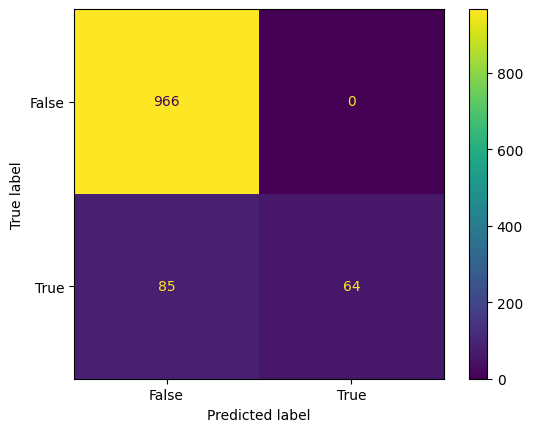

In [53]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [54]:
#Implementação do Grid Search

In [55]:
param_grid = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [57]:
grid_search= GridSearchCV(knn_model, param_grid, verbose = 1, cv=3, n_jobs = -1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [58]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Melhores parâmetros encontrados:
{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}


In [59]:
best_knn_model = grid_search.best_estimator_


In [60]:
best_knn_model.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [61]:
grid_pred = best_knn_model.predict(X_test)

In [62]:
grid_accuracy = accuracy_score(y_test, grid_pred)
print("Acurácia do modelo:", grid_accuracy)

Acurácia do modelo: 0.9461883408071748


In [63]:
classification_rep = classification_report(y_test, grid_pred)
print("Relatório de classificação:")
print(classification_rep)

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       966
           1       1.00      0.60      0.75       149

    accuracy                           0.95      1115
   macro avg       0.97      0.80      0.86      1115
weighted avg       0.95      0.95      0.94      1115



In [64]:
grid_confusion_matrix = metrics.confusion_matrix(y_test, grid_pred)

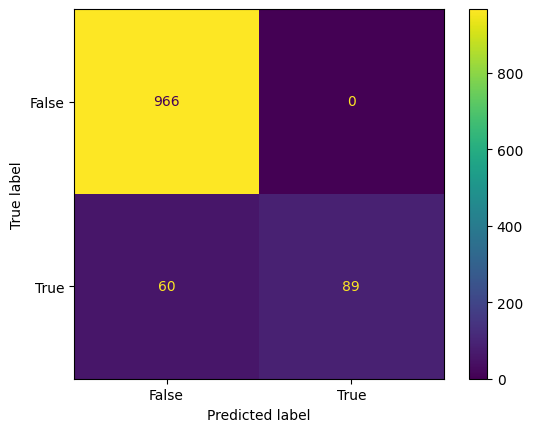

In [65]:
grid_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = grid_confusion_matrix, display_labels = [False, True])

grid_cm_display.plot()
plt.show()